<h1>Creazione serie storica mensile decessi COVID-19 confermati

In [1]:
import pandas as pd
decessi_covid = pd.read_csv('../csv/decessi_covid19.csv')
decessi_covid.head()

,data,deceduti
0,2020-02-24,7.0
1,2020-02-25,3.0
2,2020-02-26,2.0
3,2020-02-27,5.0
4,2020-02-28,4.0


In [2]:
decessi_covid.data = pd.to_datetime(decessi_covid.data)
decessi_covid.deceduti = pd.to_numeric(decessi_covid.deceduti)

decessi_covid = decessi_covid[decessi_covid['data'] > '2020-02-29']

decessi_covid=decessi_covid.set_index('data')
decessi_covid.head()

,deceduti
data,
2020-03-01,5.0
2020-03-02,18.0
2020-03-03,27.0
2020-03-04,28.0
2020-03-05,41.0


In [3]:
decessi_covid = decessi_covid.groupby(pd.Grouper(freq='M')).sum()
decessi_covid.head()

,deceduti
data,
2020-03-31,12399.0
2020-04-30,15539.0


In [4]:
ts_decessi_covid = decessi_covid.deceduti

<h1> Creazione serie storica mensile dei decessi totali ISTAT

In [5]:
df = pd.read_csv('../csv/decessi_tot.csv')
df.head()

,Data,Totale
0,2015-01-01,2632
1,2015-01-02,2182
2,2015-01-03,2215
3,2015-01-04,2264
4,2015-01-05,2301


In [6]:
df['Data'] = pd.to_datetime(df['Data'])
df.Totale = pd.to_numeric(df.Totale)

In [7]:
#PERIODO COVID
df_covid_period = df[df['Data'] > '2020-02-29']
df_covid_period.head()

,Data,Totale
1886,2020-03-01,1787
1887,2020-03-02,1887
1888,2020-03-03,1905
1889,2020-03-04,1770
1890,2020-03-05,1928


In [8]:
df_covid_period = df_covid_period.set_index('Data')
df_covid_period.head()

,Totale
Data,
2020-03-01,1787
2020-03-02,1887
2020-03-03,1905
2020-03-04,1770
2020-03-05,1928


In [9]:
df_covid_period = df_covid_period.groupby(pd.Grouper(freq='M')).sum()
df_covid_period.head()

,Totale
Data,
2020-03-31,80623
2020-04-30,64693


In [10]:
ts_covid_period = df_covid_period.Totale

<h1>Creazione serie storica predizione modello SARIMA mensile

In [11]:
predictions = pd.read_csv('../csv/predictions_SARIMA.csv')

predictions.dropna(inplace=True)
predictions.head()

,Unnamed: 0,predicted_mean
0,2015-01-31,0.000000
1,2015-02-28,66982.351388
2,2015-03-31,58862.413064
3,2015-04-30,55693.448656
4,2015-05-31,51353.371040


In [12]:
predictions.rename(columns={'Unnamed: 0': 'Data', 'predicted_mean':'Totale'}, inplace=True)
predictions.dropna(inplace=True)
predictions.head()

,Data,Totale
0,2015-01-31,0.000000
1,2015-02-28,66982.351388
2,2015-03-31,58862.413064
3,2015-04-30,55693.448656
4,2015-05-31,51353.371040


In [13]:
predictions['Data'] = pd.to_datetime(predictions['Data'])
predictions.Totale = pd.to_numeric(predictions.Totale)

#PERIODO COVID
predictions_covid_period = predictions[predictions['Data'] > '2020-02-29']
predictions_covid_period.head()

,Data,Totale
62,2020-03-31,59690.887147
63,2020-04-30,52932.227813


In [14]:
predictions_covid_period = predictions_covid_period.set_index('Data')
predictions_covid_period.head()

,Totale
Data,
2020-03-31,59690.887147
2020-04-30,52932.227813


In [15]:
ts_predictions_covid_period = predictions_covid_period.Totale

<h1>Intervalli di confidenza

<h3>Limite massimo

In [16]:
upper = pd.read_csv('../csv/predictions_SARIMA_upper.csv')
upper.head()

,Unnamed: 0,upper Totale
0,2015-01-31,99181.151210
1,2015-02-28,87836.534997
2,2015-03-31,79630.261446
3,2015-04-30,75081.630919
4,2015-05-31,70732.428508


In [17]:
upper.rename(columns={'Unnamed: 0': 'Data', 'upper Totale':'Totale'}, inplace=True)
upper['Data'] = pd.to_datetime(upper['Data'])
upper.Totale = pd.to_numeric(upper.Totale)
upper.head()

,Data,Totale
0,2015-01-31,99181.151210
1,2015-02-28,87836.534997
2,2015-03-31,79630.261446
3,2015-04-30,75081.630919
4,2015-05-31,70732.428508


In [18]:
upper = upper[upper['Data'] > '2020-02-29']
upper = upper.set_index('Data')
upper.head()

,Totale
Data,
2020-03-31,64754.214429
2020-04-30,58050.371942


In [19]:
upper = upper.Totale

<h3>Limite minimo

In [20]:
lower = pd.read_csv('../csv/predictions_SARIMA_lower.csv')
lower.head()

,Unnamed: 0,lower Totale
0,2015-01-31,-99181.151210
1,2015-02-28,46128.167779
2,2015-03-31,38094.564682
3,2015-04-30,36305.266394
4,2015-05-31,31974.313572


In [21]:
lower.rename(columns={'Unnamed: 0': 'Data', 'lower Totale':'Totale'}, inplace=True)
lower['Data'] = pd.to_datetime(lower['Data'])
lower.Totale = pd.to_numeric(lower.Totale)
lower.head()

,Data,Totale
0,2015-01-31,-99181.151210
1,2015-02-28,46128.167779
2,2015-03-31,38094.564682
3,2015-04-30,36305.266394
4,2015-05-31,31974.313572


In [22]:
lower = lower[lower['Data'] > '2020-02-29']
lower = lower.set_index('Data')
lower.head()

,Totale
Data,
2020-03-31,54627.559865
2020-04-30,47814.083683


In [23]:
lower = lower.Totale

<h1> CONFRONTO DELLE SERIE STORICHE NEI MESI DI MARZO E APRILE 2020

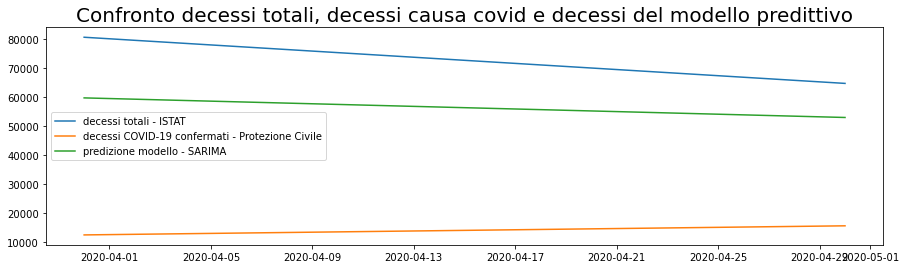

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))
plt.title('Confronto decessi totali, decessi causa covid e decessi del modello predittivo', size=20)
plt.plot(ts_covid_period, label='decessi totali - ISTAT')
plt.plot(ts_decessi_covid, label='decessi COVID-19 confermati - Protezione Civile')
plt.plot(ts_predictions_covid_period, label='predizione modello - SARIMA')

plt.legend()
plt.show()

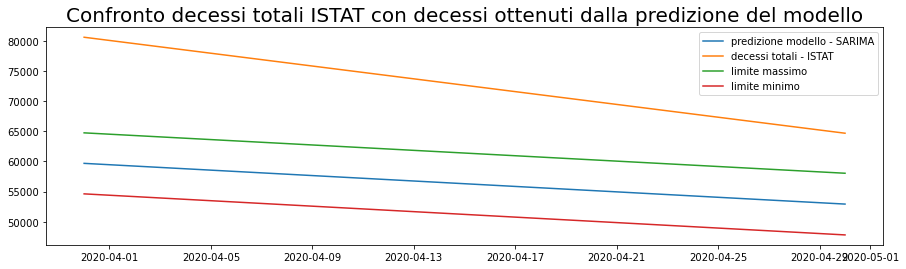

In [25]:
plt.figure(figsize=(15,4))
plt.title('Confronto decessi totali ISTAT con decessi ottenuti dalla predizione del modello', size=20)
plt.plot(ts_predictions_covid_period, label='predizione modello - SARIMA')
plt.plot(ts_covid_period, label='decessi totali - ISTAT')
plt.plot(upper, label='limite massimo')
plt.plot(lower, label='limite minimo')
plt.legend()
plt.show()

<p> <b>n:</b> decessi covid secondo il modello
    <br />
    <b>ts_covid_period:</b> decessi totali registrati dell'ISAT da febbraio a maggio
    <br />
    <b>ts_predictions_covid_period:</b> decessi previsti dal modello da febbraio a maggio 
</p>

<h2>Calcolo dei decessi COVID-19 secondo il modello predittivo</h2>

Differenza tra i decessi totali rilasciati dall'ISTAT e i decessi secondo la previsione del modello SARIMA.

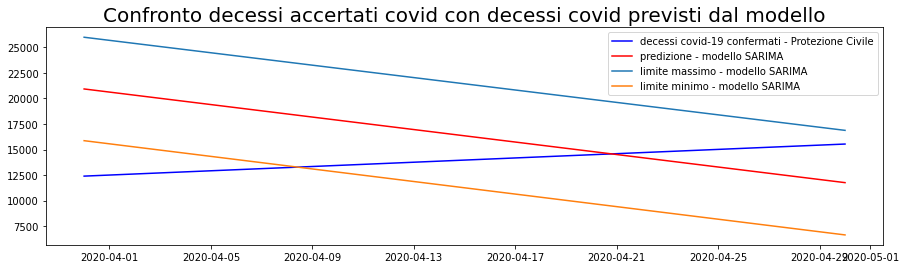

In [26]:
n = ts_covid_period - ts_predictions_covid_period
n_upper = ts_covid_period - lower
n_lower = ts_covid_period - upper

plt.figure(figsize=(15,4))
plt.title('Confronto decessi accertati covid con decessi covid previsti dal modello', size=20)
plt.plot(ts_decessi_covid, color='blue', label='decessi covid-19 confermati - Protezione Civile')
plt.plot(n, color='red', label='predizione - modello SARIMA')
plt.plot(n_upper, label='limite massimo - modello SARIMA')
plt.plot(n_lower, label='limite minimo - modello SARIMA')
plt.legend()
plt.show()

<h3>Numero totale dei decessi accertati COVID-19 nei mesi di marzo e aprile 2020

In [27]:
m = ts_decessi_covid.sum()
print(int(m))

27938


<h3>Numero totale dei decessi COVID-19 previsti dal modello SARIMA nei mesi di marzo e aprile 2020</h3>

<h4>Valore medio

In [28]:
total = n.sum()
print(int(total))

32692


<h4>Valore massimo

In [29]:
total_upper = n_upper.sum()
print(int(total_upper))

42874


<h4>Valore minimo

In [30]:
total_lower = n_lower.sum()
print(int(total_lower))

22511


<h3>Stima del numero dei decessi COVID-19 non registrati secondo il modello predittivo SARIMA nei mesi di marzo e aprile 2020

<h4>Valore medio

In [31]:
x = ts_covid_period - ts_predictions_covid_period - ts_decessi_covid
x = x.sum()
print(int(x))

4754


<h4>Valore massimo

In [32]:
x_upper = ts_covid_period - lower - ts_decessi_covid
x_upper = x_upper.sum()
print(int(x_upper))

14936


<h4>Valore minimo

In [33]:
x_lower = ts_covid_period - upper - ts_decessi_covid
x_lower = x_lower.sum()
print(int(x_lower))

-5426
